## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_metadata_combined_df = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")
mouse_metadata_combined_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice in the DataFrame.
mouse_count_df = mouse_metadata_combined_df['Mouse ID'].unique()
len(mouse_count_df) 

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id = mouse_metadata_combined_df.loc[mouse_metadata_combined_df.duplicated(['Mouse ID' , 'Timepoint'])]
duplicate_mouse_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id_df = mouse_metadata_combined_df.loc[mouse_metadata_combined_df['Mouse ID']=='g989']
duplicate_mouse_id_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_id_df = mouse_metadata_combined_df.loc[mouse_metadata_combined_df['Mouse ID']!='g989']
cleaned_mouse_id_df 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_mouse_id_df['Mouse ID'].unique())

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Regimen_group = cleaned_mouse_id_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]
means = Regimen_group.mean()
means

medians = Regimen_group.median()
medians

variances = Regimen_group.var()
variances

stand_deiv = Regimen_group.std()
stand_deiv


stand_error = Regimen_group.sem()
stand_error

Regimen_group_combined_df = pd.DataFrame({"Vol_means":  means,
                                          "Vol_median": medians,
                                          "Variance": variances, 
                                          "Vol_stamn_dev": stand_deiv,
                                         "Vol_error": stand_error})

Regimen_group_combined_df
# This method is the most straightforward, creating multiple series and putting them all together at the end.


,Vol_means,Vol_median,Variance,Vol_stamn_dev,Vol_error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.

## Bar Plots

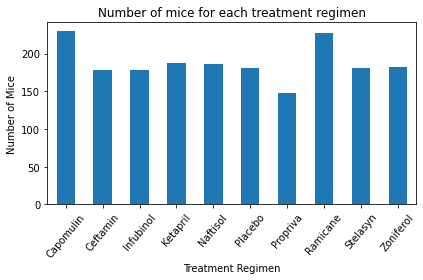

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
Mouse_bar_plot = cleaned_mouse_id_df.groupby(['Drug Regimen']).count()['Mouse ID']
Mouse_bar_plot.plot(kind = 'bar' , rot =50)

plt.title('Number of mice for each treatment regimen')
plt.xlabel('Treatment Regimen')
plt.ylabel('Number of Mice')

plt.tight_layout()
plt.show()




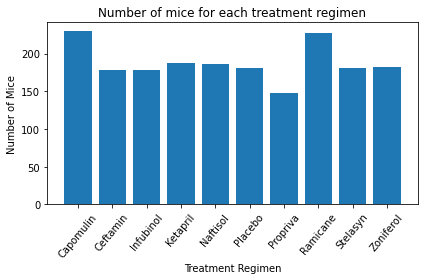

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
plt.bar(Mouse_bar_plot.index , Mouse_bar_plot.values )
plt.title('Number of mice for each treatment regimen')
plt.xlabel('Treatment Regimen')
plt.ylabel('Number of Mice')

plt.xticks(rotation = 50)

plt.tight_layout()
plt.show()





## Pie Plots

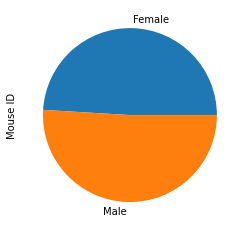

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Female_male_mice = cleaned_mouse_id_df.groupby('Sex').count()['Mouse ID']
#Pie_Plot_Mouse = Female_male_mice['Mouse ID'].nunique

#Mouse_bar_plot = cleaned_mouse_id_df.groupby(['Drug Regimen']).count()['Mouse ID']
Female_male_mice.plot(kind = 'pie')
#explode = (20, 0)


plt.show()



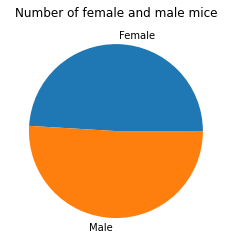

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(Female_male_mice.values, labels=Female_male_mice.index)
plt.title('Number of female and male mice')

#plt.tight_layout()
plt.show()



## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
Groupby_Drug_Regimen = cleaned_mouse_id_df.groupby('Drug Regimen').min()['Tumor Volume (mm3)']
Groupby_Drug_Regimen
Drugs_identified = ["Ceftamin", "Capomulin", "Infubinol", "Ramicane"] 
Drugs_identified

boxplot_df = cleaned_mouse_id_df.loc[cleaned_mouse_id_df["Timepoint"]==45]
boxplot_df






,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_vol_by_drug = []
for drug in Drugs_identified:
    
    current_vol = boxplot_df.loc[boxplot_df["Drug Regimen"]==drug,"Tumor Volume (mm3)"]
    tumor_vol_by_drug.append(current_vol)
    
    quartiles = current_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"\n**************{drug}***************\n")
    print(f"The lower quartile of tumor volumne is: {lowerq}")
    print(f"The upper quartile of tumor volumne is: {upperq}")
    print(f"The interquartile range of tumor volumne is: {iqr}")
    print(f"The the median of tumor volumne is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")




**************Ceftamin***************

The lower quartile of tumor volumne is: 61.43389223
The upper quartile of tumor volumne is: 67.52748237
The interquartile range of tumor volumne is: 6.093590140000003
The the median of tumor volumne is: 64.29983003 
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.

**************Capomulin***************

The lower quartile of tumor volumne is: 32.37735684
The upper quartile of tumor volumne is: 40.1592203
The interquartile range of tumor volumne is: 7.781863460000004
The the median of tumor volumne is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

**************Infubinol***************

The lower quartile of tumor volumne is: 62.75445141
The upper quartile of tumor volumne is: 67.68556862
The interquartile range of tumor volumne is: 4.9311172099999965
The the median of tumor volumne is: 66.08306589 
Values below 55.35777559500001 could be ou

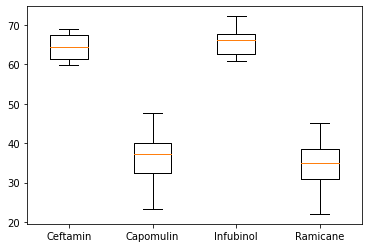

In [17]:
plt.boxplot(tumor_vol_by_drug, labels=Drugs_identified)
plt.show()

## Line and Scatter Plots

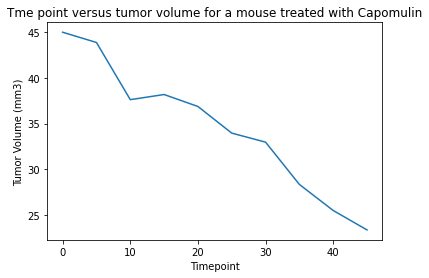

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

Mouse_s185 = cleaned_mouse_id_df.loc[cleaned_mouse_id_df["Mouse ID"]=="s185"]
Mouse_s185

plt.plot(Mouse_s185["Timepoint"],Mouse_s185["Tumor Volume (mm3)"])

plt.title('Tme point versus tumor volume for a mouse treated with Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

#As the time point increases the tumor descreases

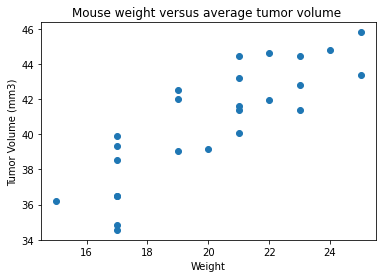

In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_df = cleaned_mouse_id_df.loc[cleaned_mouse_id_df["Drug Regimen"]=="Capomulin"]
Cap_avg = Capomulin_df.groupby("Mouse ID").mean()
Cap_avg

plt.scatter(Cap_avg["Weight (g)"],Cap_avg["Tumor Volume (mm3)"])

plt.title('Mouse weight versus average tumor volume ')
plt.xlabel('Weight')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

#I can conclude that Capomulin is working

## Correlation and Regression

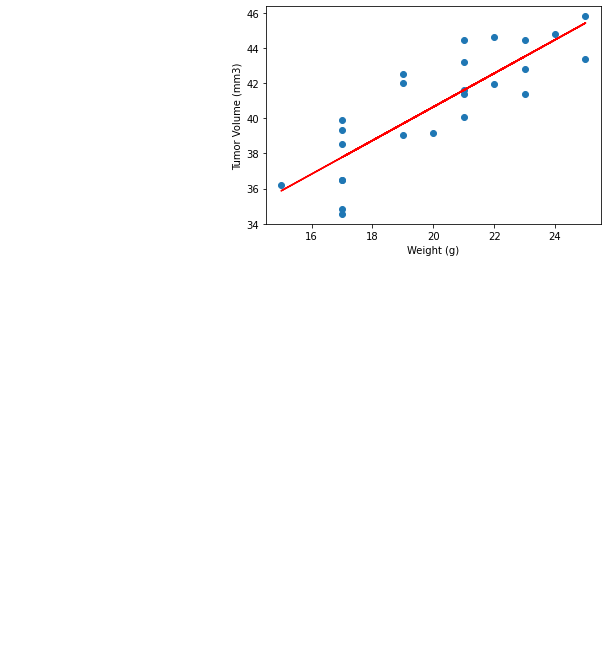

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = Cap_avg["Weight (g)"]
y_values = Cap_avg["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

#there is corrcelation 